In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [225]:
df = pd.read_csv('/content/Train (1).csv')

In [226]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [227]:
# prompt: check unique values of each columns

for column in df.columns:
  print(f"Unique values in column '{column}':")
  print(df[column].unique())
  print("\n")


Unique values in column 'Item_Identifier':
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Unique values in column 'Item_Weight':
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1 

In [228]:
# prompt: number of unique values per each column

for column in df.columns:
  print(f"Unique values in column '{column}': {len(df[column].unique())}")


Unique values in column 'Item_Identifier': 1559
Unique values in column 'Item_Weight': 416
Unique values in column 'Item_Fat_Content': 5
Unique values in column 'Item_Visibility': 7880
Unique values in column 'Item_Type': 16
Unique values in column 'Item_MRP': 5938
Unique values in column 'Outlet_Identifier': 10
Unique values in column 'Outlet_Establishment_Year': 9
Unique values in column 'Outlet_Size': 4
Unique values in column 'Outlet_Location_Type': 3
Unique values in column 'Outlet_Type': 4
Unique values in column 'Item_Outlet_Sales': 3493


In [229]:
# prompt: Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] in this column 'Low Fat', 'low fat', 'LF' are one category only so replace names of  'low fat' and 'LF' with  'Low Fat'.

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], 'Regular')
df['Item_Fat_Content'].unique()


array(['Low Fat', 'Regular'], dtype=object)

In [230]:
# prompt: Unique values in column Outlet_Establishment_Year: [1999 2009 1998 1987 1985 2002 2007 1997 2004] from this column create a new column with the name of 'outlet age' from current year - establishment year and delete old variable Outlet_Establishment_Year in df, include new variable outlet age in df,

import datetime

# Get the current year
current_year = datetime.datetime.now().year

# Create a new column for outlet age
df['Outlet_Age'] = current_year - df['Outlet_Establishment_Year']

# Drop the old column
df.drop('Outlet_Establishment_Year', axis=1, inplace=True)


In [231]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,37


In [232]:
# prompt: remove duplicate rows from df

df = df.drop_duplicates()


In [233]:
# prompt: check data frame rows and columns

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 8523
Number of columns: 12


In [234]:
#check missing values

print("Number of missing values in each column:")
print(df.isnull().sum())


Number of missing values in each column:
Item_Identifier            0
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Age                 0
dtype: int64


In [235]:
# Group the data by 'Item_Identifier' and calculate the mode of 'Item_Weight' for each group
mode_weights = df.groupby('Item_Identifier')['Item_Weight'].agg(pd.Series.mode)

# Fill in the missing values in 'Item_Weight' with the corresponding mode value
df['Item_Weight'].fillna(df['Item_Identifier'].map(mode_weights), inplace=True)


In [236]:
#check missing values again

print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Age                 0
dtype: int64


In [237]:
# prompt: pivot table  for Outlet_Size, Outlet_Location_Type, Outlet_Type

import numpy as np
pivot_table = df.pivot_table(index=['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], values='Item_Outlet_Sales', aggfunc=np.mean)
print(pivot_table)


                                                    Item_Outlet_Sales
Outlet_Size Outlet_Location_Type Outlet_Type                         
High        Tier 3               Supermarket Type1        2298.995256
Medium      Tier 1               Supermarket Type1        2348.354635
            Tier 3               Supermarket Type2        1995.498739
                                 Supermarket Type3        3694.038558
Small       Tier 1               Grocery Store             340.329723
                                 Supermarket Type1        2277.844267
            Tier 2               Supermarket Type1        2438.841866


In [238]:
df['Outlet_Size'].value_counts()


Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [239]:
df['Outlet_Type'].value_counts()


Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [240]:
mode_outlet = df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [241]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [242]:
missing_values = df['Outlet_Size'].isnull()

In [243]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [244]:
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])

In [245]:
df.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Outlet_Age              0
dtype: int64

In [246]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,37


In [247]:
# prompt: apply one hot encoding to Item_Identifier and drop first column after applied

import pandas as pd
# Create dummy variables for 'Item_Identifier'
item_dummies = pd.get_dummies(df['Item_Identifier'], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, item_dummies], axis=1)

# Drop the original 'Item_Identifier' column
df.drop('Item_Identifier', axis=1, inplace=True)


In [248]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,NCZ05,NCZ06,NCZ17,NCZ18,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54
0,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,...,False,False,False,False,False,False,False,False,False,False
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,...,False,False,False,False,False,False,False,False,False,False
2,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,...,False,False,False,False,False,False,False,False,False,False
3,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,...,False,False,False,False,False,False,False,False,False,False
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,...,False,False,False,False,False,False,False,False,False,False


In [249]:
# prompt: apply ordinal encoding to Item_Fat_Content, Outlet_Size, Outlet_Location_Type ,Outlet_Type

from sklearn.preprocessing import OrdinalEncoder

# Create an ordinal encoder
encoder = OrdinalEncoder()

# Apply ordinal encoding to the specified columns
df['Item_Fat_Content'] = encoder.fit_transform(df[['Item_Fat_Content']])
df['Outlet_Size'] = encoder.fit_transform(df[['Outlet_Size']])
df['Outlet_Location_Type'] = encoder.fit_transform(df[['Outlet_Location_Type']])
df['Outlet_Type'] = encoder.fit_transform(df[['Outlet_Type']])



In [250]:
df.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,NCZ05,NCZ06,NCZ17,NCZ18,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54
0,9.3,0.0,0.016047,Dairy,249.8092,OUT049,1.0,0.0,1.0,3735.1380,...,False,False,False,False,False,False,False,False,False,False
1,5.92,1.0,0.019278,Soft Drinks,48.2692,OUT018,1.0,2.0,2.0,443.4228,...,False,False,False,False,False,False,False,False,False,False
2,17.5,0.0,0.016760,Meat,141.6180,OUT049,1.0,0.0,1.0,2097.2700,...,False,False,False,False,False,False,False,False,False,False
3,19.2,1.0,0.000000,Fruits and Vegetables,182.0950,OUT010,2.0,2.0,0.0,732.3800,...,False,False,False,False,False,False,False,False,False,False
4,8.93,0.0,0.000000,Household,53.8614,OUT013,0.0,2.0,1.0,994.7052,...,False,False,False,False,False,False,False,False,False,False


In [251]:
# prompt: get dummies for Item_Type, Outlet_Identifier

import pandas as pd
# Create dummy variables for 'Item_Type'
item_type_dummies = pd.get_dummies(df['Item_Type'], drop_first=True)

# Create dummy variables for 'Outlet_Identifier'
outlet_identifier_dummies = pd.get_dummies(df['Outlet_Identifier'], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, item_type_dummies, outlet_identifier_dummies], axis=1)

# Drop the original 'Item_Type' and 'Outlet_Identifier' columns
df.drop(['Item_Type', 'Outlet_Identifier'], axis=1, inplace=True)


In [252]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,DRA24,...,Starchy Foods,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,9.3,0.0,0.016047,249.8092,1.0,0.0,1.0,3735.1380,25,False,...,False,False,False,False,False,False,False,False,False,True
1,5.92,1.0,0.019278,48.2692,1.0,2.0,2.0,443.4228,15,False,...,False,False,False,True,False,False,False,False,False,False
2,17.5,0.0,0.016760,141.6180,1.0,0.0,1.0,2097.2700,25,False,...,False,False,False,False,False,False,False,False,False,True
3,19.2,1.0,0.000000,182.0950,2.0,2.0,0.0,732.3800,26,False,...,False,False,False,False,False,False,False,False,False,False
4,8.93,0.0,0.000000,53.8614,0.0,2.0,1.0,994.7052,37,False,...,False,True,False,False,False,False,False,False,False,False


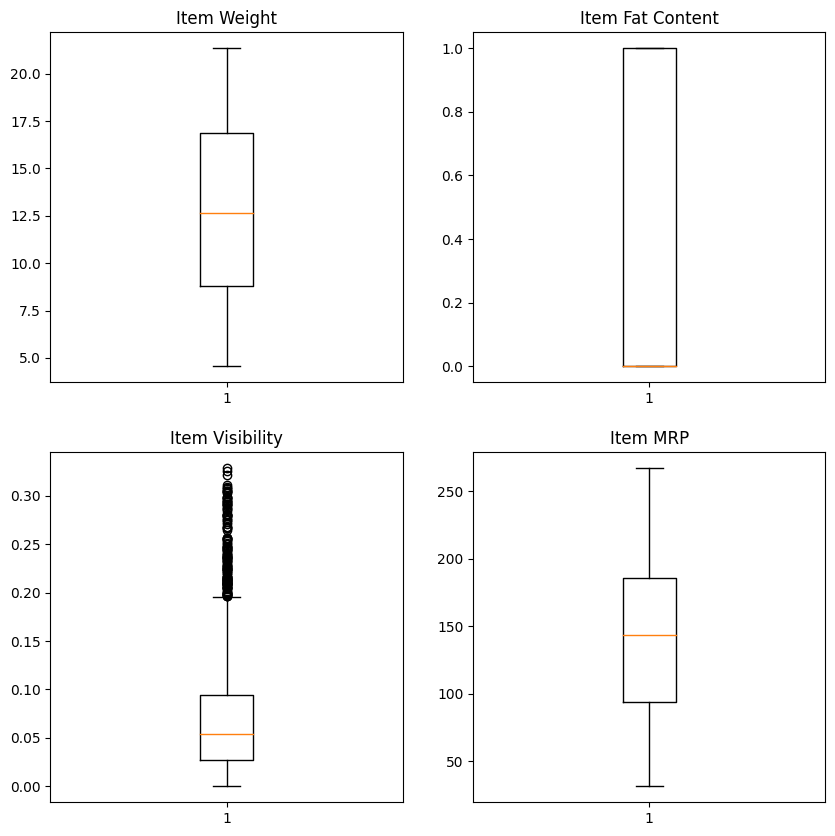

In [253]:
# prompt: create box plots for Item_Weight	Item_Fat_Content	Item_Visibility	Item_MRP	Item_Outlet_Sales

import matplotlib.pyplot as plt

# Create a figure and axes
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Create a box plot for 'Item_Weight'
axs[0, 0].boxplot(df['Item_Weight'])
axs[0, 0].set_title('Item Weight')

# Create a box plot for 'Item_Fat_Content'
axs[0, 1].boxplot(df['Item_Fat_Content'])
axs[0, 1].set_title('Item Fat Content')

# Create a box plot for 'Item_Visibility'
axs[1, 0].boxplot(df['Item_Visibility'])
axs[1, 0].set_title('Item Visibility')

# Create a box plot for 'Item_MRP'
axs[1, 1].boxplot(df['Item_MRP'])
axs[1, 1].set_title('Item MRP')

# Show the plot
plt.show()


In [254]:
# prompt: remove outliers in item visibility

# Calculate the lower and upper bounds for outliers
lower_bound = df['Item_Visibility'].quantile(0.05)
upper_bound = df['Item_Visibility'].quantile(0.95)

# Filter the DataFrame to remove outliers
df = df[(df['Item_Visibility'] >= lower_bound) & (df['Item_Visibility'] <= upper_bound)]




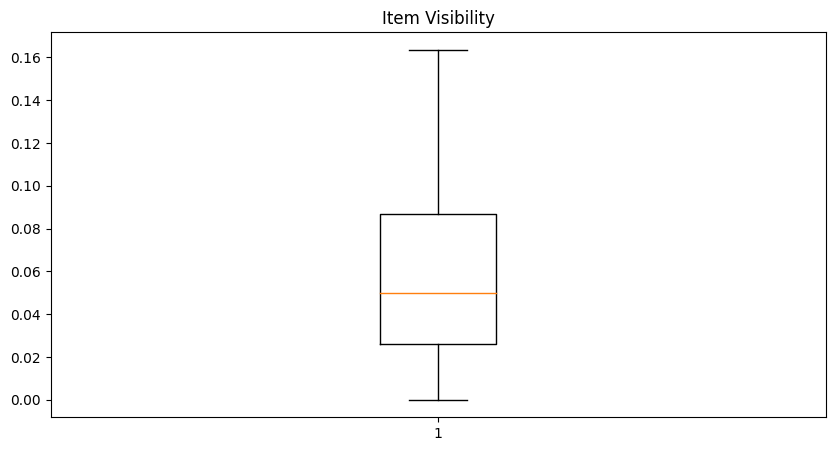

In [255]:
# prompt: boxplot for Item_Visibility

import matplotlib.pyplot as plt
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Create a box plot for 'Item_Visibility'
ax.boxplot(df['Item_Visibility'])
ax.set_title('Item Visibility')

# Show the plot
plt.show()


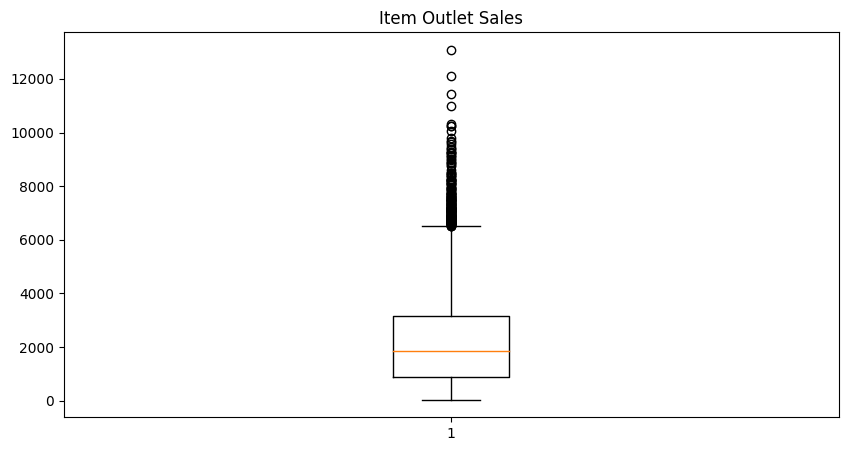

In [256]:
# prompt: boxplot for Item_Outlet_Sales

import matplotlib.pyplot as plt
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Create a box plot for 'Item_Outlet_Sales'
ax.boxplot(df['Item_Outlet_Sales'])
ax.set_title('Item Outlet Sales')

# Show the plot
plt.show()


In [257]:
# prompt: remove outliers in Item_Outlet_Sales

# Calculate the lower and upper bounds for outliers
lower_bound = df['Item_Outlet_Sales'].quantile(0.05)
upper_bound = df['Item_Outlet_Sales'].quantile(0.95)

# Filter the DataFrame to remove outliers
df = df[(df['Item_Outlet_Sales'] >= lower_bound) & (df['Item_Outlet_Sales'] <= upper_bound)]


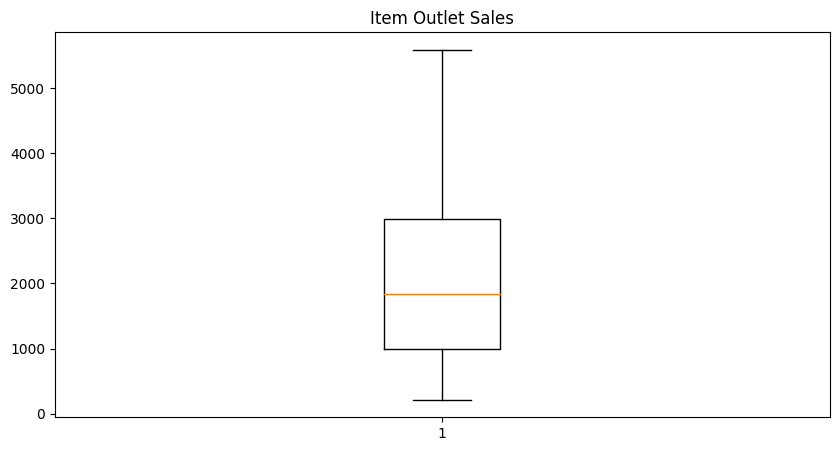

In [258]:
# prompt: boxplot for Item_Outlet_Sales

import matplotlib.pyplot as plt
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Create a box plot for 'Item_Outlet_Sales'
ax.boxplot(df['Item_Outlet_Sales'])
ax.set_title('Item Outlet Sales')

# Show the plot
plt.show()


In [259]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,DRA24,...,Starchy Foods,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,9.3,0.0,0.016047,249.8092,1.0,0.0,1.0,3735.1380,25,False,...,False,False,False,False,False,False,False,False,False,True
1,5.92,1.0,0.019278,48.2692,1.0,2.0,2.0,443.4228,15,False,...,False,False,False,True,False,False,False,False,False,False
2,17.5,0.0,0.016760,141.6180,1.0,0.0,1.0,2097.2700,25,False,...,False,False,False,False,False,False,False,False,False,True
3,19.2,1.0,0.000000,182.0950,2.0,2.0,0.0,732.3800,26,False,...,False,False,False,False,False,False,False,False,False,False
4,8.93,0.0,0.000000,53.8614,0.0,2.0,1.0,994.7052,37,False,...,False,True,False,False,False,False,False,False,False,False


In [260]:
print(df.dtypes)


Item_Weight          object
Item_Fat_Content    float64
Item_Visibility     float64
Item_MRP            float64
Outlet_Size         float64
                     ...   
OUT027                 bool
OUT035                 bool
OUT045                 bool
OUT046                 bool
OUT049                 bool
Length: 1591, dtype: object


In [261]:
print(df.isnull().sum())


Item_Weight         0
Item_Fat_Content    0
Item_Visibility     0
Item_MRP            0
Outlet_Size         0
                   ..
OUT027              0
OUT035              0
OUT045              0
OUT046              0
OUT049              0
Length: 1591, dtype: int64


In [262]:
df['Item_Weight'] = pd.to_numeric(df['Item_Weight'], errors='coerce')

In [263]:
df['Item_Weight'].dtype

dtype('float64')

In [268]:
# Remove rows with NaN values in the 'Item_Weight' column
df.dropna(subset=['Item_Weight'], inplace=True)

# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)


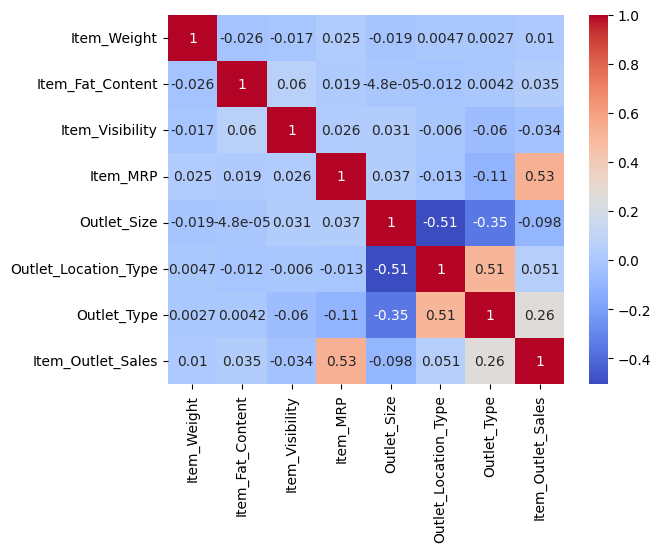

In [269]:
# prompt: create heatmap Item_Weight	Item_Fat_Content	Item_Visibility	Item_MRP	Outlet_Size	Outlet_Location_Type	Outlet_Type	Item_Outlet_Sales	Outlet_Age

import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the correlation matrix
sns.heatmap(df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']].corr(), annot=True, cmap='coolwarm')

# Show the plot
plt.show()


In [270]:
# prompt: Variables that need to be standardized are:
# 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', and 'Outlet_Age'.

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Age']])

# Transform the data
df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Age']] = scaler.transform(df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Age']])


In [271]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,DRA24,...,Starchy Foods,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,-0.761566,0.0,-1.027880,1.822272,1.0,0.0,1.0,1.231556,-0.064205,False,...,False,False,False,False,False,False,False,False,False,True
1,-1.487176,1.0,-0.949937,-1.506592,1.0,2.0,2.0,-1.241439,-1.283512,False,...,False,False,False,True,False,False,False,False,False,False
2,0.998789,0.0,-1.010685,0.035263,1.0,0.0,1.0,0.001061,-0.064205,False,...,False,False,False,False,False,False,False,False,False,True
3,1.363741,1.0,-1.415008,0.703828,2.0,2.0,0.0,-1.024352,0.057726,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.840997,0.0,-1.415008,-1.414225,0.0,2.0,1.0,-0.827273,1.398964,False,...,False,True,False,False,False,False,False,False,False,False


In [279]:
# prompt:  outlet sales comun in the middle but place in th df as last coumn

# Move the 'Item_Outlet_Sales' column to the last position in the DataFrame
cols = list(df.columns)
cols.pop(cols.index('Item_Outlet_Sales'))
cols.append('Item_Outlet_Sales')
df = df[cols]


In [281]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,DRA24,DRA59,...,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,Item_Outlet_Sales
0,-0.761566,0.0,-1.027880,1.822272,1.0,0.0,1.0,-0.064205,False,False,...,False,False,False,False,False,False,False,False,True,1.231556
1,-1.487176,1.0,-0.949937,-1.506592,1.0,2.0,2.0,-1.283512,False,False,...,False,False,True,False,False,False,False,False,False,-1.241439
2,0.998789,0.0,-1.010685,0.035263,1.0,0.0,1.0,-0.064205,False,False,...,False,False,False,False,False,False,False,False,True,0.001061
3,1.363741,1.0,-1.415008,0.703828,2.0,2.0,0.0,0.057726,False,False,...,False,False,False,False,False,False,False,False,False,-1.024352
4,-0.840997,0.0,-1.415008,-1.414225,0.0,2.0,1.0,1.398964,False,False,...,True,False,False,False,False,False,False,False,False,-0.827273


In [282]:
# prompt: download df into csv file

df.to_csv('final_df.csv', index=False)


# New Section